In [1]:
using Distributions, Plots, LinearAlgebra, SpecialFunctions


$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0

In [25]:
const spacesteps = 1000::Int64
const L = 1.00::Float64
const h = (L/spacesteps)::Float64

const c = 1.00::Float64

const endtime = 0.10::Float64
const dt = abs(h/c)::Float64#1e-4::Float64
const timesteps = Int64(div(endtime,dt)+1)::Int64

const γ = c*dt/h

1.0

In [26]:
function gaussian(x::Float64; x0 = 0.3, σ = 0.025)
    return exp(-(x - x0)^2 / σ)
end

function Lax_Wandroff_trans(u_init, spacesteps, timesteps; γ = 1.00)
    u = zeros(spacesteps, timesteps)
    u[:,1] = u_init
    for n in 1:timesteps-1
        u[2:end-1, n+1] = @. u[2:end-1, n] - 0.5 * γ * (u[3:end, n] - u[1:end-2, n]) + 0.5 * γ^2 * (u[3:end, n] - 2 * u[2:end-1,n] + u[1:end-2, n]) 
        u[end, n] = u[1,n]
    end
    return u
end

function trans_anal(f::Function, x::LinRange{Float64, Int64}, t::LinRange{Float64, Int64}; c = 1)
    arg = x .- c .* t'
    return f.(arg)

end

function u0(x)
    return max(1 - (4 * (x - 0.5))^2, 0)
end

function Lax_Wandroff_Hopf(u_init, spacesteps, timesteps; γ = 1.00)
    u = zeros(spacesteps,timesteps)
    u[:, 1] = u_init
    for n in 1:timesteps-1
        u[2:end-1, n+1] = @. u[2:end-1, n] - γ/4 * ((u[3:end, n]) ^ 2 - (u[1:end-2, n])^2) + (γ^2 / 8)
                          @. *((u[3:end, n] + u[2:end-1, n]) * ((u[3:end, n])^2 - (u[2:end-1, n])^2) 
                             -(u[2:end-1, n] + u[1:end-2, n]) * ((u[2:end-1, n])^2 - (u[1:end-2, n])^2))
        u[1, n+1] = u[2, n+1]
        u[end, n+1] = u[end-1, n+1]                 
    end
    return u
end

Lax_Wandroff_Hopf (generic function with 1 method)

In [27]:
x = LinRange(0, 2*L, spacesteps)
t = LinRange(0, endtime, timesteps)
u_init = u0.(x)


1000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [28]:
u = Lax_Wandroff_trans(u_init, spacesteps, timesteps; γ)

u_an = trans_anal(u0, x, t; c)

print(size(u_an))

(1000, 101)

┌ Info: Saved animation to d:\Uni\Computational Physics\Computational_Physics_v24\Computational_Physics_v24\Diffusion_Waves_Shock\figures\transport_eqn\advection_equation_solution_new.gif
└ @ Plots C:\Users\emoeu\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("d:\\Uni\\Computational Physics\\Computational_Physics_v24\\Computational_Physics_v24\\Diffusion_Waves_Shock\\figures\\transport_eqn\\advection_equation_solution_new.gif")
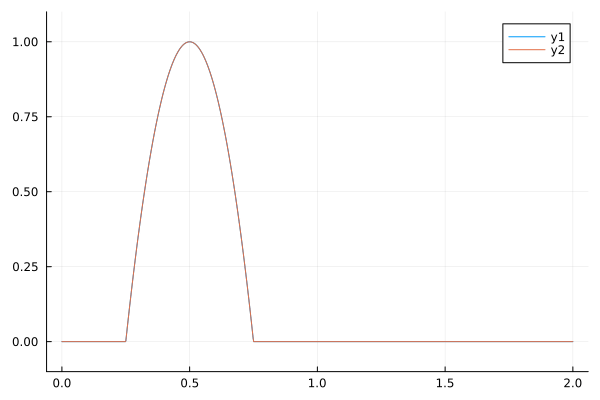

In [29]:
anim = @animate for n in 1:10:timesteps
    p1 = plot(x, u[:, n], ylim =(-0.1, 1.1))
    p2 = plot!(x, u_an[:, n], ylim =(-0.1, 1.1))
    # p = plot(p1,p2, layout= (1,2), size = (800,500), suptitle = "\nAnalitical and numerical solution at time t = $(round(time[n], digits = 4))")
end
gif(anim, "figures/transport_eqn/advection_equation_solution_new.gif", fps=7)


┌ Info: Saved animation to d:\Uni\Computational Physics\Computational_Physics_v24\Computational_Physics_v24\Diffusion_Waves_Shock\figures\transport_eqn\advection_equation_solution_new.gif
└ @ Plots C:\Users\emoeu\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("d:\\Uni\\Computational Physics\\Computational_Physics_v24\\Computational_Physics_v24\\Diffusion_Waves_Shock\\figures\\transport_eqn\\advection_equation_solution_new.gif")
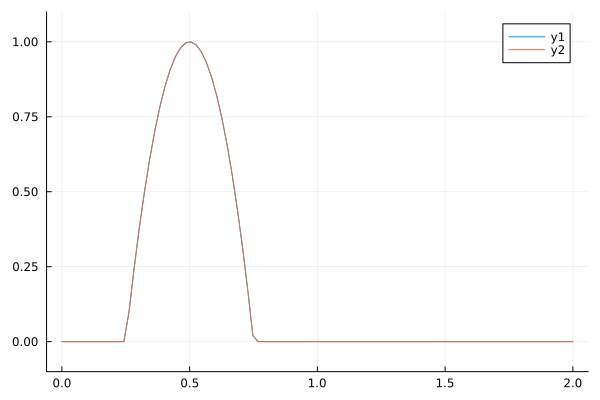

In [7]:
gif(anim, "figures/transport_eqn/advection_equation_solution_new.gif", fps=7)


In [30]:
x = LinRange(0, L, spacesteps)
t = LinRange(0, endtime, timesteps)
u_init = sin.(π * x)

u = Lax_Wandroff_Hopf(u_init, spacesteps, timesteps; γ)

print()

┌ Info: Saved animation to d:\Uni\Computational Physics\Computational_Physics_v24\Computational_Physics_v24\Diffusion_Waves_Shock\figures\transport_eqn\hopf_equation_solution_.gif
└ @ Plots C:\Users\emoeu\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("d:\\Uni\\Computational Physics\\Computational_Physics_v24\\Computational_Physics_v24\\Diffusion_Waves_Shock\\figures\\transport_eqn\\hopf_equation_solution_.gif")
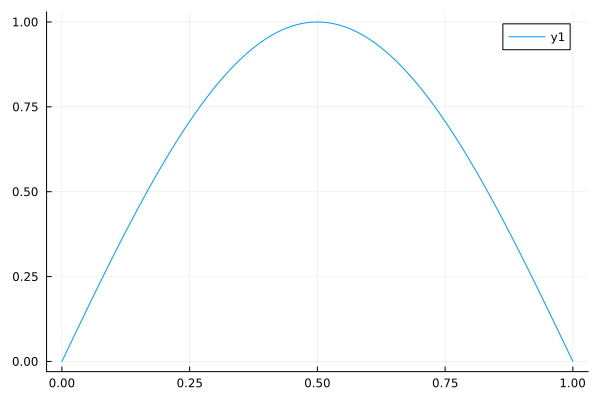

In [31]:
anim = @animate for n in 1:timesteps
    p1 = plot(x, u[:, n])
    # p = plot(p1,p2, layout= (1,2), size = (800,500), suptitle = "\nAnalitical and numerical solution at time t = $(round(time[n], digits = 4))")
end
gif(anim, "figures/transport_eqn/hopf_equation_solution_.gif", fps=7)